In [96]:
import numpy as np
import matplotlib.pyplot as plt
import time
from networkenv import NetworkEnv
import game
import networkx as nx
from utils import create_approx_greedy_player

In [40]:
# create some rules for the game
r = game.Rules()
r.nb_max_step = 10
r.nb_players = 5
SIM_SIZE = 100
sim_values = np.zeros([SIM_SIZE, r.nb_players])

# create a game with these rules
g = game.Game(r)
for i in range(r.nb_players):
    greedy_player = create_approx_greedy_player("Player {}".format(i), r, eps=.2, delta=.05)
    g.add_player(greedy_player)

# create an RL environment with with game
env = NetworkEnv(g)
for i in range(SIM_SIZE):
    env.reset()
    time1 = time.time()
    print("Starting game {}".format(i))
    for j in range(r.nb_max_step):
        env.game.play_round()
    time2 = time.time()
    print("Finished game {0} in {1} seconds".format(i, (time2-time1)))
    final_vals = list(nx.betweenness_centrality(env.game.graph).values())
    sim_values[i] = final_vals

Starting game 0
Finished game 0 in 16.233708143234253 seconds
Starting game 1
Finished game 1 in 25.468188047409058 seconds
Starting game 2
Finished game 2 in 16.902592182159424 seconds
Starting game 3
Finished game 3 in 16.965267181396484 seconds
Starting game 4
Finished game 4 in 12.455220937728882 seconds
Starting game 5
Finished game 5 in 9.37251901626587 seconds
Starting game 6
Finished game 6 in 9.756088972091675 seconds
Starting game 7
Finished game 7 in 8.942525863647461 seconds
Starting game 8
Finished game 8 in 8.731940031051636 seconds
Starting game 9
Finished game 9 in 9.033190965652466 seconds
Starting game 10
Finished game 10 in 14.003718852996826 seconds
Starting game 11
Finished game 11 in 8.808636903762817 seconds
Starting game 12
Finished game 12 in 7.361041069030762 seconds
Starting game 13
Finished game 13 in 6.679178953170776 seconds
Starting game 14
Finished game 14 in 8.008893966674805 seconds
Starting game 15
Finished game 15 in 13.683194875717163 seconds
Starti

In [44]:
means = sim_values.mean(axis=0)
variance = sim_values.var(axis=0)

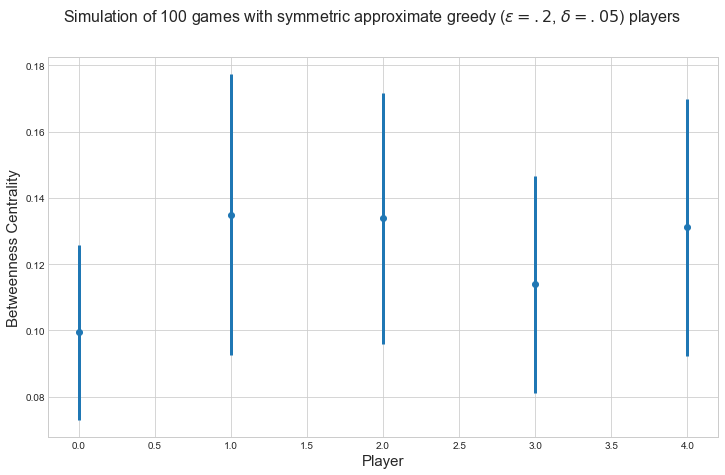

In [98]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
ax.errorbar(x = np.arange(5),  y = means, yerr=variance, fmt='o', lw=3)
plt.suptitle("Simulation of 100 games with symmetric approximate greedy " +
             "($\epsilon = .2$, $\delta = .05$) players", fontsize=16)
plt.ylabel("Betweenness Centrality", fontsize=15)
plt.xlabel("Player", fontsize=15)